# Mathematical Underpinnings - Lab 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [4]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [5]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [6]:
X = scale(X)
Y = scale(Y)

### a)

In [7]:
mod_lars = Lars(fit_intercept=False)
# fit
mod_lars = mod_lars.fit(X, Y)

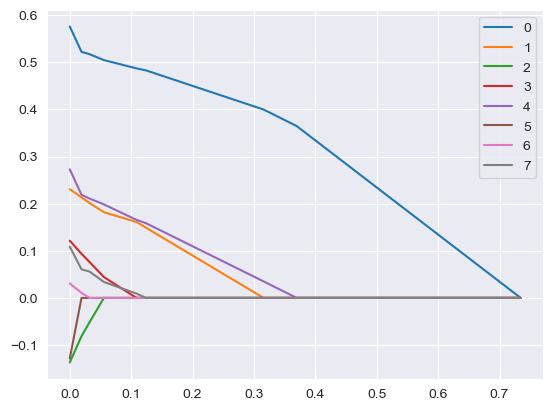

In [8]:
# plot
plt.plot(mod_lars.alphas_, mod_lars.coef_path_.T)
plt.legend(range(8))
plt.show()

Order in which the variables are included in the model:

In [9]:
mod_lars.alphas_

array([0.73446033, 0.36963266, 0.3157    , 0.12438766, 0.10869606,
       0.05558212, 0.03210302, 0.01913394, 0.        ])

In [10]:
exclude = set()
for row in mod_lars.coef_path_.T:
    for i in range(len(row)):
        if row[i] != 0:
            if i not in exclude:
                print(i)
            exclude.add(i)

0
4
1
7
3
2
6
5


### b)

In [11]:
mod_lars.alphas_[0]

0.7344603262136731

Could bo also taken as max form the covariance matrix calculated below.

### b1)

In [12]:
selected_variables = []

In [13]:
correlations = []
for i in range(len(X.T)):
    m = np.corrcoef(X.T[i], Y)
    correlations.append(m[0][1])
print(correlations)

[0.7344603262136737, 0.43331938249261975, 0.16959283918685042, 0.1798094039414574, 0.5662182224414467, 0.5488131747249603, 0.3689868062872309, 0.42231585787949766]


In [14]:
S_1 = np.argmax(correlations)
alpha_1 = correlations[S_1]

In [15]:
selected_variables.append(S_1)

### b2)

In [16]:
mod1 = LinearRegression(fit_intercept=False)
mod1.fit(X[:, [S_1]], Y)
mod1.coef_

array([0.73446033])

### b3)

In [17]:
# code
alphas_hat = np.linspace(0, 1, 100)
correlations_alphas = []
for a in alphas_hat:
    r = Y - a * mod1.predict(X.T[S_1].T.reshape(-1, 1))

    correlations_alphas.append(np.corrcoef(X.T, r)[-1, :8])

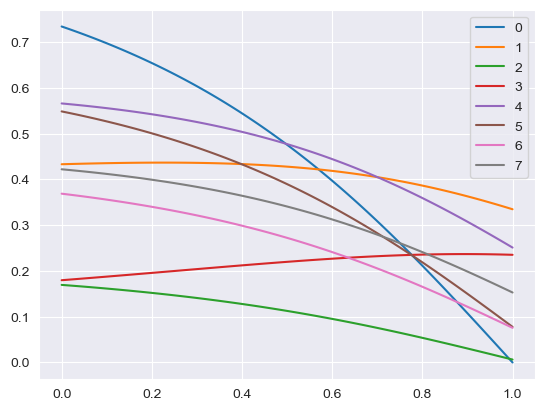

In [18]:
# plot
plt.plot(alphas_hat, correlations_alphas)
plt.legend(range(8))
plt.show()

blue line visualizes the theorem

### b4)

It will be variable 4

In [19]:
for i in range(len(alphas_hat)):
    if correlations_alphas[i][0] < correlations_alphas[i][4]:
        print(alphas_hat[i])
        alpha_hat_2 = alphas_hat[i]
        break

0.5050505050505051


In [20]:
r2 = Y - alpha_hat_2 * mod1.predict(X.T[S_1].T.reshape(-1, 1))
np.corrcoef(X.T, r2)[-1, :8][[0, 4]]

array([0.47217841, 0.47583941])

### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

In [21]:
def single_term(Y, X, number):
    return np.sqrt(np.var(Y)) * np.corrcoef(Y, X[:, number])[0][1]

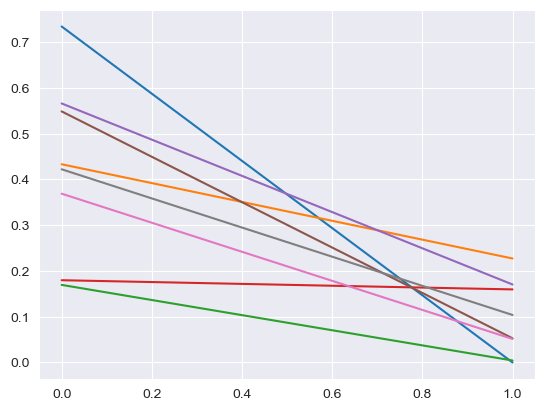

In [22]:
alphas_hat = np.linspace(0, 1, 100)
values = []
for alpha in alphas_hat:
    values_single_alpha = []
    for i in range(len(X[0])):
        values_single_alpha.append(single_term(Y, X, i) - single_term(mod1.predict(X[:, 0].reshape(-1, 1)), X, i) * alpha)

    values.append(values_single_alpha)

plt.plot(alphas_hat, values)
plt.show()

In [23]:
# code
# same signs bo bylo widac tam na plocie
alpha_hat_2_exact = (single_term(Y, X, 0) - single_term(Y, X, 4)) / (
            single_term(mod1.predict(X[:, 0].reshape(-1, 1)), X, 0) - single_term(mod1.predict(X[:, 0].reshape(-1, 1)),
                                                                                  X, 4))

In [24]:
alpha_hat_2_exact

0.49672890138719566

### b6)

In [25]:
r2 = Y - alpha_hat_2_exact * mod1.predict(X.T[S_1].T.reshape(-1, 1))
np.corrcoef(X.T, r2)[-1, :8][[0, 4]]

array([0.47831254, 0.47831254])

In [26]:
selected_variables.append(4)

In [27]:
alpha_2 = single_term(Y, X, 4) - alpha_hat_2_exact * single_term(mod1.predict(X[:, 0].reshape(-1, 1)),
                                                                 X, 4)
alpha_2

0.36963265526107447

### b7)

In [28]:
S_2=4

In [29]:
X

array([[-1.64586143, -2.01663373, -1.87210098, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.9993129 , -0.72575948, -0.79198919, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.58702059, -2.20015441,  1.36823439, -1.03002898, -0.52565748,
        -0.86765522,  0.34440695, -0.15615511],
       [-2.17817387, -0.8121913 , -0.79198919, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.5105128 , -0.46121762, -0.25193329, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-2.04670586, -0.93880639, -1.87210098, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.5226677 , -0.3646778 ,  0.01809466,  0.35670122, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.56020767, -0.20984103, -0.79198919,  0.99529051, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.81362657, -0.20984103

In [30]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(X[:, [S_1, S_2]], r2)
mod2.coef_

array([0.24020136, 0.24020136])

### b8)

In [31]:
# code
alphas = np.linspace(0, 1, 100)
correlations_alphas = []
for a in alphas:
    r2_new = r2 - a * mod2.predict(X[:, [S_1, S_2]])

    correlations_alphas.append(np.corrcoef(X.T, r2_new)[-1, :8])

In [32]:
correlations_alphas

[array([0.47831254, 0.42829184, 0.11323548, 0.21976555, 0.47831254,
        0.39136539, 0.27333496, 0.34176076]),
 array([0.47490238, 0.42820477, 0.11249633, 0.22060944, 0.47490238,
        0.3882939 , 0.27178473, 0.33997987]),
 array([0.47146148, 0.42810791, 0.11175031, 0.22145361, 0.47146148,
        0.38519557, 0.27021932, 0.33818094]),
 array([0.4679897 , 0.4280011 , 0.11099739, 0.22229798, 0.4679897 ,
        0.38207029, 0.26863863, 0.33636386]),
 array([0.4644869 , 0.42788416, 0.11023753, 0.22314244, 0.4644869 ,
        0.37891797, 0.2670426 , 0.33452852]),
 array([0.46095295, 0.42775694, 0.1094707 , 0.2239869 , 0.46095295,
        0.37573848, 0.26543112, 0.33267481]),
 array([0.45738772, 0.42761927, 0.10869686, 0.22483126, 0.45738772,
        0.37253173, 0.26380413, 0.33080263]),
 array([0.45379107, 0.42747097, 0.10791599, 0.2256754 , 0.45379107,
        0.36929762, 0.26216154, 0.32891187]),
 array([0.45016291, 0.42731188, 0.10712806, 0.22651923, 0.45016291,
        0.36603606, 

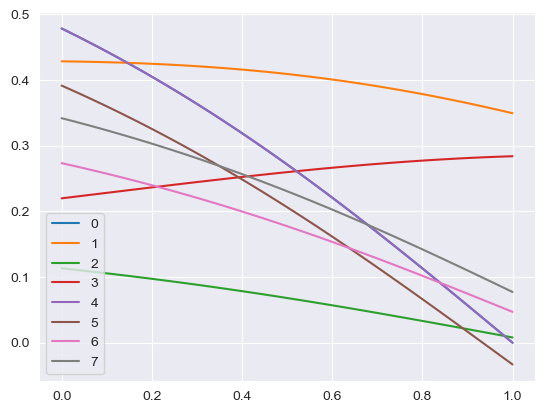

In [33]:
# plot
plt.plot(alphas, correlations_alphas)
plt.legend(range(8))
plt.show()

It's the blue and purple line which overlap that visualize the theorem.

### b9)

In [34]:
for i in range(len(alphas)):
    if correlations_alphas[i][4] < correlations_alphas[i][1]:
        print(alphas[i])
        alpha_3 = alphas[i]
        break

0.15151515151515152


### b10)

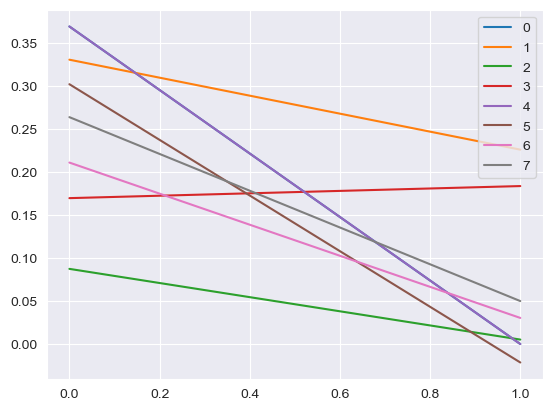

In [35]:
alphas = np.linspace(0, 1, 100)
values = []
for alpha in alphas:
    values_single_alpha = []
    for i in range(len(X[0])):
        values_single_alpha.append(single_term(r2, X, i) - single_term(mod2.predict(X[:, [S_1, S_2]]), X, i) * alpha)

    values.append(values_single_alpha)

plt.plot(alphas, values)
plt.legend(range(8))
plt.show()

In [36]:
def single_term(Y, X, number):
    return np.sqrt(np.var(Y)) * np.corrcoef(Y, X[:, number])[0][1]

In [37]:
alpha_hat_3_exact = (single_term(r2, X, 4) - single_term(r2, X, 1)) / (
        single_term(mod2.predict(X[:, [0, 4]]), X, 4) - single_term(mod2.predict(X[:, [0,4]]),
                                                                              X, 1))
alpha_hat_3_exact

0.14590879649354674

Done on paper partially. It is analogous to what we have done during the labs. The things that change is that now r2 is response variable instead of Y, and we have freedom to choose in one formula between 0 and 4 (two of our firstly selected variables) when choosing the third variable, as S_1 and S_2 will both give us the same number when calculating the correlation.

### b11)

In [38]:
r3 = r2 - alpha_hat_3_exact * mod2.predict(X[:, [S_1, S_2]])


In [39]:
np.corrcoef(X.T, r2)[-1, :8][[0, 4, 1]]

array([0.47831254, 0.47831254, 0.42829184])

In [40]:
alpha_3 = single_term(r2, X, 1) - alpha_hat_3_exact * single_term(mod2.predict(X[:, [0, 4]]),
                                                                 X, 1)
alpha_3

0.31569999938721693